<a href="https://colab.research.google.com/github/sipocz/DataMiner/blob/main/DataMiner_20230316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
import pandas as pd
import os
from bs4 import  BeautifulSoup

In [300]:
from google.colab import drive

In [301]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [302]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/"

In [303]:
fname="Eseményfeladatok _ RG - IT Service Management.html"


In [304]:
htmltext=open(path+fname)

In [305]:
ht=htmltext.read()

In [306]:
print("------------------------------------------------")

soup=BeautifulSoup(ht,"html.parser")
table_rows1=soup.find_all("tr", class_="list_row list_odd is-selected")
table_rows2=soup.find_all("tr", class_="list_row list_even is-selected")
table_rows=table_rows1+table_rows2

------------------------------------------------


In [307]:
len(table_rows)

224

In [308]:
a_row=table_rows[2].find_all("td",class_="vt")

In [309]:
a_row[7].div["timeago"]

'2021-11-04 09:53:51'

In [310]:
a_row[7].div.text

'2021-11-04 10:53:51'

In [311]:
def print_a_row(a_row,to_print=False):
    task_id=a_row[0].a["aria-label"].split(": ")[1]
    task_link=a_row[0].a["href"]
    task_description=a_row[1].text
    inc_name=a_row[6].a["aria-label"].split(": ")[1]
    inc_link=a_row[6].a["href"]
    t_creation=a_row[8].div.text
    t_start=a_row[7].div.text
    t_end=a_row[9].div.text
    try:
        full_text=a_row[10]["title"]
    except:
        full_text="None"

    if to_print:
        print("taskid:",task_id,"\ntask_link: ",task_link)
        print(a_row[1].text)

        print("incident name:",inc_name)
        print("incident link:",inc_link )
    
        print("Creation time:",t_creation)
        print("Start time:",t_start)
        print("End time",t_end)
    


         
        print("Text descriptiopn:",full_text)
        
        print("__________________________")
    return([task_id,task_link,task_description,inc_name,inc_link,t_creation,t_start,t_end,full_text])

In [312]:
data_list=[]
for a_row_e in table_rows:
    a_row=a_row_e.find_all("td",class_="vt")
    data_list.append(print_a_row(a_row,to_print=False))


In [313]:
print (len(data_list))

224


In [314]:
fname="Incidents _ RG - IT Service Management.html"

In [315]:
htmltext=open(path+fname)

In [316]:
ht=htmltext.read()
soup=BeautifulSoup(ht,"html.parser")


In [317]:
table_rows1=soup.find_all("tr",  class_="list_row list_odd ")
table_rows2=soup.find_all("tr",  class_="list_row list_even ")
table_rows=table_rows1+table_rows2

In [318]:
len(table_rows)

0

In [319]:
#a_row=table_rows[2].find_all("td",class_="vt")

In [320]:
def print_incident_row(a_row,to_print=False):
    task_id=a_row[0].a["aria-label"].split(": ")[1]
    task_link="https://richterprod.service-now.com/"+a_row[0].a["href"]
    task_description=a_row[4].text
    inc_name=task_id
    inc_link=task_link
    t_creation=a_row[11].div.text
    t_start=a_row[10].div.text
    t_end=a_row[12].div.text
    try:
        full_text1=a_row[4].text
    except:
        full_text1="None"

    
    try:
        full_text2=a_row[14]["title"]
    except:
        full_text2="None"
    full_text=full_text1+"\n"+full_text2
    if to_print:
        print("taskid:",task_id,"\ntask_link: ",task_link)
        print("task description:",task_description)

        print("incident name:",inc_name)
        print("incident link:",inc_link )
    
        print("Creation time:",t_creation)
        print("Start time:",t_start)
        print("End time",t_end)
    


         
        print("Text description:",full_text)
        
        print("__________________________")
    return([task_id,task_link,task_description,inc_name,inc_link,t_creation,t_start,t_end,full_text])
    

In [321]:
data_list2=[]
for a_row_e in table_rows:
    a_row=a_row_e.find_all("td",class_="vt")
    data_list2.append(print_incident_row(a_row,to_print=False))

In [322]:
len(data_list2)


0

In [323]:
all_data_list=data_list+data_list2


In [324]:
len(all_data_list)

224

In [325]:
import pandas as pd


In [326]:
df=pd.DataFrame(all_data_list,columns=["Task","TaskLink","Desc","Inc","IncLink","Creation","Start","End","LongDesc"])

In [327]:
df[['Start', 'End', 'Creation']] = df[['Start', 'End', 'Creation']].apply(pd.to_datetime)

In [328]:
df["End_Delta"]=df["End"]-df["Start"]
df["End_Delta_sec"]=pd.to_numeric(df["End_Delta"]/1000000000)

In [329]:
df["Start_Delta"]=df["Start"]-df["Creation"]
df["Start_Delta_sec"]=pd.to_numeric(df["Start_Delta"]/1000000000)

In [330]:
df.sort_values(["Creation"],inplace=True,ignore_index=True)

In [331]:
df.reindex()

,Task,TaskLink,Desc,Inc,IncLink,Creation,Start,End,LongDesc,End_Delta,End_Delta_sec,Start_Delta,Start_Delta_sec
0,TASK0216008,https://richterprod.service-now.com/incident_t...,"Az OV-01 TFL operátori állomás meghibásodott, ...",INC0118840,https://richterprod.service-now.com/incident.d...,2021-09-08 07:45:29,2021-09-08 07:48:13,2021-11-05 07:09:23,"Az operátori állomás meghibásodott, nem indíth...",57 days 23:21:10,5008870,0 days 00:02:44,164
1,TASK0225687,https://richterprod.service-now.com/incident_t...,T5 tartály vezérelt fűtése nem működik ezért b...,INC0126270,https://richterprod.service-now.com/incident.d...,2021-10-15 07:19:48,2021-10-15 07:19:53,2021-10-19 15:09:13,T5 tartály fűtése csak kézi üzemmódban működik...,4 days 07:49:20,373760,0 days 00:00:05,5
2,TASK0225759,https://richterprod.service-now.com/incident_t...,Nem tudom kinyomtatni a mérési eredményeket.,INC0126341,https://richterprod.service-now.com/incident.d...,2021-10-15 09:58:58,2021-10-15 09:59:21,2021-10-19 15:07:54,Nem tudom kinyomtatni a mérési eredményeket a ...,4 days 05:08:33,364113,0 days 00:00:23,23
3,TASK0227851,https://richterprod.service-now.com/incident_t...,nem tudunk nyomtatni,INC0127776,https://richterprod.service-now.com/incident.d...,2021-10-25 06:53:38,2021-10-25 06:53:42,2021-11-15 11:00:12,None,21 days 04:06:30,1829190,0 days 00:00:04,4
4,TASK0230843,https://richterprod.service-now.com/incident_t...,AZ RG-LAB rendszerből nem tudunk feladatot nyo...,INC0129902,https://richterprod.service-now.com/incident.d...,2021-11-04 10:53:28,2021-11-04 10:53:51,2021-11-04 13:30:30,"A feladatot ki lehet választani nyomtatásra, a...",0 days 02:36:39,9399,0 days 00:00:23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,TASK0313943,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186376,https://richterprod.service-now.com/incident.d...,2022-09-19 17:35:35,2022-09-19 17:35:38,2022-09-20 10:08:32,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 16:32:54,59574,0 days 00:00:03,3
220,TASK0314205,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186606,https://richterprod.service-now.com/incident.d...,2022-09-20 14:21:14,2022-09-20 14:21:18,2022-09-21 11:32:29,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 21:11:11,76271,0 days 00:00:04,4
221,TASK0314325,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186693,https://richterprod.service-now.com/incident.d...,2022-09-21 07:24:42,2022-09-21 07:24:46,2022-10-10 13:22:29,received from: MAS_DOR_2_ServiceDesk@richter.h...,19 days 05:57:43,1663063,0 days 00:00:04,4
222,TASK0314346,https://richterprod.service-now.com/incident_t...,L5 légkezelő hibás split-range szabályzás,INC0186699,https://richterprod.service-now.com/incident.d...,2022-09-21 07:40:54,2022-09-21 07:40:59,2022-09-26 12:50:00,A következő beírás került a műszaknaplóba.-> S...,5 days 05:09:01,450541,0 days 00:00:05,5


In [332]:
df.loc[df["Task"]=="TASK0234168"]

,Task,TaskLink,Desc,Inc,IncLink,Creation,Start,End,LongDesc,End_Delta,End_Delta_sec,Start_Delta,Start_Delta_sec
7,TASK0234168,https://richterprod.service-now.com/incident_t...,Központi PW Biztonsági üzemmódban nitrogén sza...,INC0132233,https://richterprod.service-now.com/incident.d...,2021-11-15 07:59:52,2021-11-15 08:00:01,2021-11-15 11:22:41,Központi PW kiszolgáló rendszer Biztonsági üze...,0 days 03:22:40,12160,0 days 00:00:09,9


<AxesSubplot:>

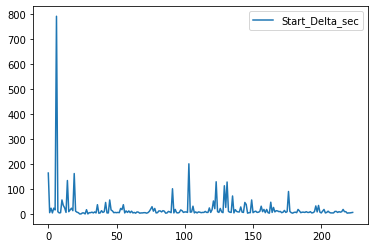

In [333]:
df.plot(y="Start_Delta_sec")

In [334]:
df.loc[100].TaskLink

'https://richterprod.service-now.com/incident_task.do?sys_id=c6a1a4cc873e8dd061ab202c8bbb3544&sysparm_record_target=incident_task&sysparm_record_row=101&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on'

In [335]:
df.loc[100].IncLink

'https://richterprod.service-now.com/incident.do?sys_id=d1812c00877e8dd061ab202c8bbb353c'

In [336]:
for i in range(len(df)):
    print(i,df.loc[i].IncLink)

0 https://richterprod.service-now.com/incident.do?sys_id=ece4a22bdb5ab850b4c40573f3961976
1 https://richterprod.service-now.com/incident.do?sys_id=9b8fd7c4db1374549fdbbb13f3961904
2 https://richterprod.service-now.com/incident.do?sys_id=7bd2449cdb1b74549fdbbb13f396192e
3 https://richterprod.service-now.com/incident.do?sys_id=de5a3e5bdbd3bc109fdbbb13f39619c7
4 https://richterprod.service-now.com/incident.do?sys_id=6c519326dba3f0d0b4c40573f3961989
5 https://richterprod.service-now.com/incident.do?sys_id=248fe11fdbeb34d09fdbbb13f39619d4
6 https://richterprod.service-now.com/incident.do?sys_id=702b987adba3fc909fdbbb13f3961925
7 https://richterprod.service-now.com/incident.do?sys_id=5a0ddf0adb7370505674b3b4f39619fa
8 https://richterprod.service-now.com/incident.do?sys_id=0bbb9386db7370505674b3b4f3961913
9 https://richterprod.service-now.com/incident.do?sys_id=de5a3e5bdbd3bc109fdbbb13f39619c7
10 https://richterprod.service-now.com/incident.do?sys_id=a18ae57edb3b38505674b3b4f396190f
11 https:

In [337]:
for i in range(len(df)):
    print(i,df.loc[i].TaskLink)

0 https://richterprod.service-now.com/incident_task.do?sys_id=fa348d90dbaa7090b4c40573f39619c5&sysparm_record_target=incident_task&sysparm_record_row=1&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
1 https://richterprod.service-now.com/incident_task.do?sys_id=6b212fccdb5f7854b4c40573f3961904&sysparm_record_target=incident_task&sysparm_record_row=2&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
2 https://richterprod.service-now.com/incident_task.do?sys_id=f6954458db5b74549fdbbb13f3961903&sysparm_record_target=incident_task&sysparm_record_row=3&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
3 https://richterprod.service-now.com/incident_task.do?sys_id=791bbe9bdbd3bc109fdbbb13f396198a&sysparm_record_target=incident_task&sysparm_record_row=4&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_cre

In [338]:
fname="INC0188514 _ Incidens _ RG - IT Service Management.html"
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/inc/"


In [339]:
htmltext=open(path+fname)
ht=htmltext.read()
soup=BeautifulSoup(ht,"html.parser")

In [340]:
print("------------------------------------------------")

soup=BeautifulSoup(ht,"html.parser")
table_rows=soup.find_all("li", class_="h-card h-card_md h-card_comments")


------------------------------------------------


In [341]:
table_rows[7]

<li class="h-card h-card_md h-card_comments"><div class="sn-card-component sn-card-component_first sn-card-component_meta sn-card-component_meta_sibling"><span class="sn-card-component-createdby">Rendszer</span></div><div class="sn-card-component sn-card-component_first sn-card-component_meta"><span class="sn-card-component-time"><span>E-mail elküldött</span><span class="sn-card-component_accent-bar_bullet">•</span><div class="date-calendar">2022-09-29 12:09:31</div><div class="datex date-timeago" data-original-title="5 hónappal ezelőtt" null="5 hónappal ezelőtt" timeago="2022-09-29 10:09:31" title="5 hónappal ezelőtt">5 hónappal ezelőtt</div></span></div><div class="sn-card-component sn-card-component_records"><div class="sn-widget"><ul class="sn-widget-list sn-widget-list-table"><li><span class="sn-widget-list-table-cell"><span class="icon-mail"></span></span><span class="sn-widget-list-table-cell">E-mail elküldött</span></li><li><span class="sn-widget-list-table-cell">Tárgy:</span><

In [342]:
def find_elements(el):
    temp=el.findChildren()
    return len(temp)

In [343]:
def incident_record_elements(incident_record, to_print=False):
    out=[]
    for child in incident_record.descendants:
        try:
            if find_elements(child)==0:
                if to_print:
                    print(child.text)
                out.append(child.text)
        except:
            pass
    return(out)
            

In [344]:
def get_all_html(path:str):
    import os
    files=os.scandir(path=path,)
    o=[a.name for a in files if "html" in a.name ]
    o.sort()
    return o


In [345]:
html_files = get_all_html(path)

In [346]:
html_files

['Eseményfeladatok _ RG - IT Service Management.html',
 'INC0182764 _ Incidens _ RG - IT Service Management.html',
 'INC0184094 _ Incidens _ RG - IT Service Management.html',
 'INC0185060 _ Incidens _ RG - IT Service Management.html',
 'INC0186693 _ Incidens _ RG - IT Service Management.html',
 'INC0186699 _ Incidens _ RG - IT Service Management.html',
 'INC0188514 _ Incidens _ RG - IT Service Management.html',
 'INC0188968 _ Incidens _ RG - IT Service Management.html',
 'INC0189031 _ Incidens _ RG - IT Service Management.html',
 'INC0189820 _ Incidens _ RG - IT Service Management.html',
 'INC0190538 _ Incidens _ RG - IT Service Management.html',
 'INC0190559 _ Incidens _ RG - IT Service Management.html',
 'INC0192385 _ Incidens _ RG - IT Service Management.html',
 'INC0192653 _ Incidens _ RG - IT Service Management.html',
 'INC0192657 _ Incidens _ RG - IT Service Management.html',
 'INC0192918 _ Incidens _ RG - IT Service Management.html',
 'INC0192933 _ Incidens _ RG - IT Service Ma

In [347]:
def critical_stepps(incident_record_list):
    '''
    Adatok strukturálása
    '''
    o=[]
    for incident_record in incident_record_list:
        incident_record_list=incident_record_elements(incident_record)
        print (incident_record_list)
        if "ServiceNow - Incidens került a csoportodra | Incident has been assigned to your group" in incident_record_list:
            o1=f"0:csoporton:{incident_record_list[3]}"
            print(o1)
            o.append(o1)
        
        if "ServiceNow - Incidens került a nevedre | Incident has been assigned to you" in incident_record_list:
            o2=f"1:kollégán:{incident_record_list[3]}"
            print(o2)
            o.append(o2)
        if "Megoldott (véglegesen)" in incident_record_list:
            o3=f"2:megoldott:{incident_record_list[5]}"
            print(o3)
            o.append(o3)
        
        if "Megoldott (kerülő megoldás)" in incident_record_list:
            o4=f"2:megoldott (kerülővel):{incident_record_list[5]}"
            print(o4)
            o.append(o4)
        
        if "Nem megoldott (nem reprodukálható)" in incident_record_list:
            o5=f"2:megoldott (Nem megoldott de nem reprodukálható)):{incident_record_list[5]}"
            print(o5)
            o.append(o5)
    return o   
        
            


In [348]:
table_rows

[<li class="h-card h-card_md h-card_comments"><div class="sn-card-component sn-card-component_first sn-card-component_meta sn-card-component_meta_sibling"><span class="sn-card-component-createdby">Rendszer</span></div><div class="sn-card-component sn-card-component_first sn-card-component_meta"><span class="sn-card-component-time"><span>E-mail elküldött</span><span class="sn-card-component_accent-bar_bullet">•</span><div class="date-calendar">2022-09-29 13:56:57</div><div class="datex date-timeago" data-original-title="5 hónappal ezelőtt" null="5 hónappal ezelőtt" timeago="2022-09-29 11:56:57" title="5 hónappal ezelőtt">5 hónappal ezelőtt</div></span></div><div class="sn-card-component sn-card-component_records"><div class="sn-widget"><ul class="sn-widget-list sn-widget-list-table"><li><span class="sn-widget-list-table-cell"><span class="icon-mail"></span></span><span class="sn-widget-list-table-cell">E-mail elküldött</span></li><li><span class="sn-widget-list-table-cell">Tárgy:</span>

In [349]:
critical_stepps(table_rows)

['Rendszer', 'E-mail elküldött', '•', '2022-09-29 13:56:57', '5 hónappal ezelőtt', '', 'E-mail elküldött', 'Tárgy:', 'INC0188514 ([DCS rendszerek dorog - hibajegy]) - Bejelentése megoldásra került | Your incident has been resolved', 'Küldő:', 'IT Service Desk', 'Címzett:', 'Katalin.Nemeth@richter.hu', '', 'E-mail részletek megjelenítése', '', '']
['Rendszer', 'E-mail elküldött', '•', '2022-09-29 13:56:57', '5 hónappal ezelőtt', '', 'E-mail elküldött', 'Tárgy:', 'ServiceNow - Neveden lévő Incidens frissült | Incident assigned to you has been updated', 'Küldő:', 'IT Service Desk', 'Címzett:', 'l.kollar@Richter.hu', '', 'E-mail részletek megjelenítése', '', '']
['LK', '', 'Lajos Kollár', 'Mezőmódosítások', '•', '2022-09-29 13:56:46', '5 hónappal ezelőtt', 'Eseményállapot', 'Megoldott', '– előtte:', 'Folyamatban', 'Megoldáskód', 'Megoldott (véglegesen)', '']
2:megoldott:2022-09-29 13:56:46
['Rendszer', 'E-mail elküldött', '•', '2022-09-29 12:36:00', '5 hónappal ezelőtt', '', 'E-mail elküld

['2:megoldott:2022-09-29 13:56:46',
 '1:kollégán:2022-09-29 12:35:02',
 '0:csoporton:2022-09-29 12:09:31']

In [350]:
def list_all_incident(path:str):
    html_files=get_all_html(path)
    #print(type(html_files))
    i=0
    out=[]
    for fname in html_files:
        out_rec=[]
        i+=1
        inc_name=fname.split(" ")[0]
        out_rec.append(inc_name)
        print(i,inc_name)
        htmltext=open(path+fname)
        ht=htmltext.read()
        soup=BeautifulSoup(ht,"html.parser")
        
        
        table_rows=soup.find_all("li", class_="h-card h-card_md h-card_comments")

        ret=critical_stepps(table_rows)
        out_rec.append(len(ret))
        out_rec.append(ret)
        print("------------------------------------------------")
        out.append(out_rec)
    return out

In [351]:
o=list_all_incident(path)

1 Eseményfeladatok
------------------------------------------------
2 INC0182764
['Rendszer', 'Mezőmódosítások', '•', '2022-10-25 07:36:02', '4 hónappal ezelőtt', 'Eseményállapot', 'Lezárt', '– előtte:', 'Megoldott', '']
['Rendszer', 'E-mail elküldött', '•', '2022-10-18 07:23:39', '4 hónappal ezelőtt', '', 'E-mail elküldött', 'Tárgy:', 'ServiceNow - Neveden lévő Incidens frissült | Incident assigned to you has been updated', 'Küldő:', 'IT Service Desk', 'Címzett:', 'Im.Varadi@Richter.hu', '', 'E-mail részletek megjelenítése', '', '']
['Rendszer', 'E-mail elküldött', '•', '2022-10-18 07:23:39', '4 hónappal ezelőtt', '', 'E-mail elküldött', 'Tárgy:', 'INC0182764 (szamitogep_es_tartozekai) (IS15146 mIFO EMs terminál üzembehelyezés...) - Bejelentése megoldásra került | Your incident has been resolved', 'Küldő:', 'IT Service Desk', 'Címzett:', 'vadpeter@richter.hu', '', 'E-mail részletek megjelenítése', '', '']
['IV', '', 'Imre Váradi', 'További megjegyzések', '•', '2022-10-18 07:23:28', '

In [352]:
o

[['Eseményfeladatok', 0, []],
 ['INC0182764',
  3,
  ['2:megoldott:2022-10-18 07:23:28',
   '0:csoporton:2022-10-10 14:32:07',
   '1:kollégán:2022-10-10 14:32:07']],
 ['INC0184094',
  3,
  ['2:megoldott:2022-10-14 14:29:04',
   '1:kollégán:2022-10-10 13:17:31',
   '0:csoporton:2022-10-10 13:15:56']],
 ['INC0185060',
  3,
  ['2:megoldott:2022-10-21 07:48:19',
   '1:kollégán:2022-10-10 13:19:44',
   '0:csoporton:2022-10-10 13:18:28']],
 ['INC0186693',
  3,
  ['2:megoldott (Nem megoldott de nem reprodukálható)):2022-12-20 14:19:50',
   '1:kollégán:2022-10-10 13:57:45',
   '0:csoporton:2022-10-10 13:22:50']],
 ['INC0186699',
  5,
  ['2:megoldott:2022-09-30 08:30:50',
   '1:kollégán:2022-09-29 06:59:05',
   '0:csoporton:2022-09-29 06:35:16',
   '2:megoldott:2022-09-28 10:14:59',
   '2:megoldott:2022-09-26 14:49:07']],
 ['INC0188514',
  3,
  ['2:megoldott:2022-09-29 13:56:46',
   '1:kollégán:2022-09-29 12:35:02',
   '0:csoporton:2022-09-29 12:09:31']],
 ['INC0188968',
  3,
  ['2:megoldott:2

In [353]:
incident_record_list=incident_record_elements(table_rows[4])

In [354]:
incident_record_list

['LK',
 '',
 'Lajos Kollár',
 'Munkamegjegyzések',
 '•',
 '2022-09-29 12:35:43',
 '5 hónappal ezelőtt',
 '',
 '',
 '']

In [355]:
'Megoldott (véglegesen) ' in incident_record_list

False

In [356]:
find_elements(table_rows[0])

31

In [357]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/task/"

In [358]:
html_files = get_all_html(path)

In [359]:
list_all_incident(path)

1 TASK0216008
['IV', '', 'Imre Váradi', 'Mezőmódosítások', '•', '2021-11-05 07:09:23', 'kb. egy év ezelőtt', 'Állapot', 'Lezárt (befejezett)', '– előtte:', 'Folyamatban', '']
['NS', '', 'Norbert Szenczi', 'Mezőmódosítások', '•', '2021-09-08 13:04:27', 'kb. egy év ezelőtt', 'Állapot', 'Folyamatban', '– előtte:', 'Nyitott', '']
['LK', '', 'Lajos Kollár', 'Munkamegjegyzések', '•', '2021-09-08 09:11:08', 'kb. egy év ezelőtt', '', '']
['LK', '', 'Lajos Kollár', 'Mezőmódosítások', '•', '2021-09-08 09:08:49', 'kb. egy év ezelőtt', 'Felelős', 'Lajos Kollár', '']
['BH', '', 'Bálint Heim', 'Mezőmódosítások', '•', '2021-09-08 07:48:13', 'kb. egy év ezelőtt', 'Állapot', 'Nyitott', 'Érintett CI', 'ABB System 800xA DCS folyamatirányító re', 'Hatás', '3 - Többünket érint', 'Megnyitotta', 'Bálint Heim', 'Prioritás', '3 - Közepes', '']
------------------------------------------------
2 TASK0225687
['LK', '', 'Lajos Kollár', 'Munkamegjegyzések', '•', '2021-10-19 15:09:13', 'kb. egy év ezelőtt', '', '']


[['TASK0216008', 0, []],
 ['TASK0225687', 0, []],
 ['TASK0225759', 0, []],
 ['TASK0227851', 0, []],
 ['TASK0230843', 0, []],
 ['TASK0232153', 0, []],
 ['TASK0233522', 0, []],
 ['TASK0234168', 0, []],
 ['TASK0234169', 0, []],
 ['TASK0234244', 0, []],
 ['TASK0235078', 0, []],
 ['TASK0241059', 0, []],
 ['TASK0241109', 0, []],
 ['TASK0242057', 0, []],
 ['TASK0243081', 0, []],
 ['TASK0244980', 0, []],
 ['TASK0245960', 0, []],
 ['TASK0247841', 0, []],
 ['TASK0249064', 0, []],
 ['TASK0249194', 0, []],
 ['TASK0250093', 0, []],
 ['TASK0251112', 0, []],
 ['TASK0251735', 0, []],
 ['TASK0251736', 0, []],
 ['TASK0252041', 0, []],
 ['TASK0252332', 0, []],
 ['TASK0252604', 0, []],
 ['TASK0252718', 0, []],
 ['TASK0253194', 0, []],
 ['TASK0253220', 0, []],
 ['TASK0253416', 0, []],
 ['TASK0253673', 0, []],
 ['TASK0254794', 0, []],
 ['TASK0254914', 0, []],
 ['TASK0254915', 0, []],
 ['TASK0255138', 0, []],
 ['TASK0255140', 0, []],
 ['TASK0255141', 0, []],
 ['TASK0256289', 0, []],
 ['TASK0256464', 0, []],


In [360]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/emails/"

In [361]:
def fname_converter(fname:str, to_print=False):
    o=fname.split(".")[0].split("_")
    date_s=o[0].split("-")
    time_s=o[1].split("-")
    o=date_s+time_s
    out=f"{o[0]}-{o[1]}-{o[2]} {o[3]}:{o[4]}:{o[5]}"    
    if to_print:
        print(out)
    return(out)

In [362]:
fname_converter("2022-11-10_05-52-13.txt")

'2022-11-10 05:52:13'

In [363]:
import os
import time
email_files=os.scandir(path=path,)
email_files_data=[fname_converter(a.name) for a in email_files ]

In [364]:
email_files_data.sort()
email_files_data

['2022-01-26 08:54:28',
 '2022-01-26 08:59:22',
 '2022-01-26 09:08:06',
 '2022-01-26 09:09:37',
 '2022-01-26 09:13:52',
 '2022-01-26 09:38:25',
 '2022-01-26 10:15:58',
 '2022-01-26 13:09:19',
 '2022-01-26 13:20:49',
 '2022-01-26 13:29:19',
 '2022-01-26 13:41:19',
 '2022-01-27 09:50:03',
 '2022-01-27 09:50:08',
 '2022-01-27 11:18:07',
 '2022-01-27 11:27:16',
 '2022-01-27 12:32:55',
 '2022-01-28 07:20:28',
 '2022-01-28 09:48:48',
 '2022-01-28 10:50:41',
 '2022-02-01 13:10:10',
 '2022-02-01 13:37:37',
 '2022-02-02 13:48:00',
 '2022-02-02 14:02:42',
 '2022-02-03 08:07:28',
 '2022-02-03 08:10:15',
 '2022-02-03 08:15:14',
 '2022-02-05 07:55:34',
 '2022-02-09 01:41:44',
 '2022-02-09 08:00:57',
 '2022-02-10 06:57:53',
 '2022-02-11 12:03:50',
 '2022-02-14 07:27:50',
 '2022-02-14 07:47:16',
 '2022-02-14 09:40:40',
 '2022-02-16 09:59:31',
 '2022-02-19 11:44:52',
 '2022-02-23 07:06:21',
 '2022-02-25 12:13:16',
 '2022-02-25 13:08:47',
 '2022-02-28 10:31:31',
 '2022-03-03 07:23:48',
 '2022-03-03 12:

In [365]:
len(email_files_data)

183

In [366]:
df_file_data=pd.DataFrame(email_files_data)

In [367]:
df_file_data.columns=["MASDOR_file"]
df_file_data=df_file_data.apply(pd.to_datetime)

In [368]:
df_file_data

,MASDOR_file
0,2022-01-26 08:54:28
1,2022-01-26 08:59:22
2,2022-01-26 09:08:06
3,2022-01-26 09:09:37
4,2022-01-26 09:13:52
...,...
178,2023-02-03 12:03:46
179,2023-02-06 08:12:09
180,2023-02-09 08:21:26
181,2023-02-09 10:50:41


In [369]:
inc_link

['https://richterprod.service-now.com/incident.do?sys_id=ece4a22bdb5ab850b4c40573f3961976',
 'https://richterprod.service-now.com/incident.do?sys_id=9b8fd7c4db1374549fdbbb13f3961904',
 'https://richterprod.service-now.com/incident.do?sys_id=7bd2449cdb1b74549fdbbb13f396192e',
 'https://richterprod.service-now.com/incident.do?sys_id=de5a3e5bdbd3bc109fdbbb13f39619c7',
 'https://richterprod.service-now.com/incident.do?sys_id=6c519326dba3f0d0b4c40573f3961989',
 'https://richterprod.service-now.com/incident.do?sys_id=248fe11fdbeb34d09fdbbb13f39619d4',
 'https://richterprod.service-now.com/incident.do?sys_id=702b987adba3fc909fdbbb13f3961925',
 'https://richterprod.service-now.com/incident.do?sys_id=5a0ddf0adb7370505674b3b4f39619fa',
 'https://richterprod.service-now.com/incident.do?sys_id=0bbb9386db7370505674b3b4f3961913',
 'https://richterprod.service-now.com/incident.do?sys_id=de5a3e5bdbd3bc109fdbbb13f39619c7',
 'https://richterprod.service-now.com/incident.do?sys_id=a18ae57edb3b38505674b3b

In [370]:
df["MASDOR"]="-"

In [371]:
type(df_file_data.MASDOR_file[0])

pandas._libs.tslibs.timestamps.Timestamp

In [372]:
for df_i in range(len(df)):
    if df.loc[df_i].Desc=="[DCS rendszerek dorog - hibajegy]":
        creation=df.loc[df_i].Creation
        desc=df.loc[df_i].Desc
        
        print(df_i,creation,desc)
        for file_i in range(len(df_file_data)):
            if df_file_data.loc[file_i].MASDOR_file>df.loc[df_i].Creation:
                print (f"pp:{df_i} ",df_file_data.loc[file_i-1].MASDOR_file)
                df.at[df_i,"MASDOR"]=df_file_data.loc[file_i-1].MASDOR_file
                break 





31 2022-01-27 12:42:51 [DCS rendszerek dorog - hibajegy]
pp:31  2022-01-27 12:32:55
34 2022-02-02 15:15:00 [DCS rendszerek dorog - hibajegy]
pp:34  2022-02-02 14:02:42
35 2022-02-02 15:17:01 [DCS rendszerek dorog - hibajegy]
pp:35  2022-02-02 14:02:42
36 2022-02-03 11:15:21 [DCS rendszerek dorog - hibajegy]
pp:36  2022-02-03 08:15:14
37 2022-02-03 11:18:36 [DCS rendszerek dorog - hibajegy]
pp:37  2022-02-03 08:15:14
38 2022-02-03 11:19:37 [DCS rendszerek dorog - hibajegy]
pp:38  2022-02-03 08:15:14
39 2022-02-07 07:17:52 [DCS rendszerek dorog - hibajegy]
pp:39  2022-02-05 07:55:34
42 2022-02-09 06:20:48 [DCS rendszerek dorog - hibajegy]
pp:42  2022-02-09 01:41:44
43 2022-02-09 08:49:44 [DCS rendszerek dorog - hibajegy]
pp:43  2022-02-09 08:00:57
44 2022-02-10 08:24:08 [DCS rendszerek dorog - hibajegy]
pp:44  2022-02-10 06:57:53
45 2022-02-10 15:19:42 [DCS rendszerek dorog - hibajegy]
pp:45  2022-02-10 06:57:53
49 2022-02-14 09:04:20 [DCS rendszerek dorog - hibajegy]
pp:49  2022-02-14 0

In [373]:
df

,Task,TaskLink,Desc,Inc,IncLink,Creation,Start,End,LongDesc,End_Delta,End_Delta_sec,Start_Delta,Start_Delta_sec,MASDOR
0,TASK0216008,https://richterprod.service-now.com/incident_t...,"Az OV-01 TFL operátori állomás meghibásodott, ...",INC0118840,https://richterprod.service-now.com/incident.d...,2021-09-08 07:45:29,2021-09-08 07:48:13,2021-11-05 07:09:23,"Az operátori állomás meghibásodott, nem indíth...",57 days 23:21:10,5008870,0 days 00:02:44,164,-
1,TASK0225687,https://richterprod.service-now.com/incident_t...,T5 tartály vezérelt fűtése nem működik ezért b...,INC0126270,https://richterprod.service-now.com/incident.d...,2021-10-15 07:19:48,2021-10-15 07:19:53,2021-10-19 15:09:13,T5 tartály fűtése csak kézi üzemmódban működik...,4 days 07:49:20,373760,0 days 00:00:05,5,-
2,TASK0225759,https://richterprod.service-now.com/incident_t...,Nem tudom kinyomtatni a mérési eredményeket.,INC0126341,https://richterprod.service-now.com/incident.d...,2021-10-15 09:58:58,2021-10-15 09:59:21,2021-10-19 15:07:54,Nem tudom kinyomtatni a mérési eredményeket a ...,4 days 05:08:33,364113,0 days 00:00:23,23,-
3,TASK0227851,https://richterprod.service-now.com/incident_t...,nem tudunk nyomtatni,INC0127776,https://richterprod.service-now.com/incident.d...,2021-10-25 06:53:38,2021-10-25 06:53:42,2021-11-15 11:00:12,None,21 days 04:06:30,1829190,0 days 00:00:04,4,-
4,TASK0230843,https://richterprod.service-now.com/incident_t...,AZ RG-LAB rendszerből nem tudunk feladatot nyo...,INC0129902,https://richterprod.service-now.com/incident.d...,2021-11-04 10:53:28,2021-11-04 10:53:51,2021-11-04 13:30:30,"A feladatot ki lehet választani nyomtatásra, a...",0 days 02:36:39,9399,0 days 00:00:23,23,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,TASK0313943,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186376,https://richterprod.service-now.com/incident.d...,2022-09-19 17:35:35,2022-09-19 17:35:38,2022-09-20 10:08:32,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 16:32:54,59574,0 days 00:00:03,3,2022-09-19 17:25:03
220,TASK0314205,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186606,https://richterprod.service-now.com/incident.d...,2022-09-20 14:21:14,2022-09-20 14:21:18,2022-09-21 11:32:29,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 21:11:11,76271,0 days 00:00:04,4,2022-09-20 13:55:34
221,TASK0314325,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186693,https://richterprod.service-now.com/incident.d...,2022-09-21 07:24:42,2022-09-21 07:24:46,2022-10-10 13:22:29,received from: MAS_DOR_2_ServiceDesk@richter.h...,19 days 05:57:43,1663063,0 days 00:00:04,4,2022-09-21 03:45:34
222,TASK0314346,https://richterprod.service-now.com/incident_t...,L5 légkezelő hibás split-range szabályzás,INC0186699,https://richterprod.service-now.com/incident.d...,2022-09-21 07:40:54,2022-09-21 07:40:59,2022-09-26 12:50:00,A következő beírás került a műszaknaplóba.-> S...,5 days 05:09:01,450541,0 days 00:00:05,5,-


In [374]:
inc_link=list(df[df["MASDOR"]=="-"].IncLink)

In [375]:
df.to_csv("inc_task_table.csv")

In [376]:
df.tail(10)

,Task,TaskLink,Desc,Inc,IncLink,Creation,Start,End,LongDesc,End_Delta,End_Delta_sec,Start_Delta,Start_Delta_sec,MASDOR
214,TASK0312018,https://richterprod.service-now.com/incident_t...,MIFO-D -ben az 1. izolátor és 2. izolátorhoz t...,INC0185060,https://richterprod.service-now.com/incident.d...,2022-09-12 15:17:53,2022-09-12 15:18:00,2022-10-10 13:18:14,MIFO-D -ben az 1. izolátor és 2. izolátorhoz t...,27 days 22:00:14,2412014,0 days 00:00:07,7,-
215,TASK0312987,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0185716,https://richterprod.service-now.com/incident.d...,2022-09-15 11:45:30,2022-09-15 11:45:39,2022-09-15 13:32:28,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 01:46:49,6409,0 days 00:00:09,9,2022-09-15 10:57:31
216,TASK0313161,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0185804,https://richterprod.service-now.com/incident.d...,2022-09-16 05:55:33,2022-09-16 05:55:51,2022-09-16 07:37:36,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 01:41:45,6105,0 days 00:00:18,18,2022-09-16 05:04:58
217,TASK0313545,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186116,https://richterprod.service-now.com/incident.d...,2022-09-19 06:22:10,2022-09-19 06:22:19,2022-09-20 10:10:02,received from: MAS_DOR_2_ServiceDesk@richter.h...,1 days 03:47:43,100063,0 days 00:00:09,9,2022-09-17 16:31:19
218,TASK0313675,https://richterprod.service-now.com/incident_t...,"Villamosan müködik, ABB-n van a hiba",INC0186242,https://richterprod.service-now.com/incident.d...,2022-09-19 10:53:49,2022-09-19 10:53:58,2022-09-19 11:31:25,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 00:37:27,2247,0 days 00:00:09,9,-
219,TASK0313943,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186376,https://richterprod.service-now.com/incident.d...,2022-09-19 17:35:35,2022-09-19 17:35:38,2022-09-20 10:08:32,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 16:32:54,59574,0 days 00:00:03,3,2022-09-19 17:25:03
220,TASK0314205,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186606,https://richterprod.service-now.com/incident.d...,2022-09-20 14:21:14,2022-09-20 14:21:18,2022-09-21 11:32:29,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 21:11:11,76271,0 days 00:00:04,4,2022-09-20 13:55:34
221,TASK0314325,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186693,https://richterprod.service-now.com/incident.d...,2022-09-21 07:24:42,2022-09-21 07:24:46,2022-10-10 13:22:29,received from: MAS_DOR_2_ServiceDesk@richter.h...,19 days 05:57:43,1663063,0 days 00:00:04,4,2022-09-21 03:45:34
222,TASK0314346,https://richterprod.service-now.com/incident_t...,L5 légkezelő hibás split-range szabályzás,INC0186699,https://richterprod.service-now.com/incident.d...,2022-09-21 07:40:54,2022-09-21 07:40:59,2022-09-26 12:50:00,A következő beírás került a műszaknaplóba.-> S...,5 days 05:09:01,450541,0 days 00:00:05,5,-
223,TASK0315070,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0187277,https://richterprod.service-now.com/incident.d...,2022-09-23 11:26:01,2022-09-23 11:26:07,2022-09-23 12:59:36,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 01:33:29,5609,0 days 00:00:06,6,2022-09-23 10:15:37


In [377]:
df_DCS_hibajegy=df[df["MASDOR"]!="-"]

In [378]:
df_DCS_hibajegy

,Task,TaskLink,Desc,Inc,IncLink,Creation,Start,End,LongDesc,End_Delta,End_Delta_sec,Start_Delta,Start_Delta_sec,MASDOR
31,TASK0253416,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0145247,https://richterprod.service-now.com/incident.d...,2022-01-27 12:42:51,2022-01-27 12:42:56,2022-01-27 13:01:23,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 00:18:27,1107,0 days 00:00:05,5,2022-01-27 12:32:55
34,TASK0254914,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0146378,https://richterprod.service-now.com/incident.d...,2022-02-02 15:15:00,2022-02-02 15:15:08,2022-02-02 15:38:13,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 00:23:05,1385,0 days 00:00:08,8,2022-02-02 14:02:42
35,TASK0254915,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0146377,https://richterprod.service-now.com/incident.d...,2022-02-02 15:17:01,2022-02-02 15:17:05,2022-02-02 15:40:17,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 00:23:12,1392,0 days 00:00:04,4,2022-02-02 14:02:42
36,TASK0255138,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0146550,https://richterprod.service-now.com/incident.d...,2022-02-03 11:15:21,2022-02-03 11:15:58,2022-02-03 13:22:59,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 02:07:01,7621,0 days 00:00:37,37,2022-02-03 08:15:14
37,TASK0255140,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0146552,https://richterprod.service-now.com/incident.d...,2022-02-03 11:18:36,2022-02-03 11:18:39,2022-02-03 11:31:10,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 00:12:31,751,0 days 00:00:03,3,2022-02-03 08:15:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,TASK0313545,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186116,https://richterprod.service-now.com/incident.d...,2022-09-19 06:22:10,2022-09-19 06:22:19,2022-09-20 10:10:02,received from: MAS_DOR_2_ServiceDesk@richter.h...,1 days 03:47:43,100063,0 days 00:00:09,9,2022-09-17 16:31:19
219,TASK0313943,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186376,https://richterprod.service-now.com/incident.d...,2022-09-19 17:35:35,2022-09-19 17:35:38,2022-09-20 10:08:32,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 16:32:54,59574,0 days 00:00:03,3,2022-09-19 17:25:03
220,TASK0314205,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186606,https://richterprod.service-now.com/incident.d...,2022-09-20 14:21:14,2022-09-20 14:21:18,2022-09-21 11:32:29,received from: MAS_DOR_2_ServiceDesk@richter.h...,0 days 21:11:11,76271,0 days 00:00:04,4,2022-09-20 13:55:34
221,TASK0314325,https://richterprod.service-now.com/incident_t...,[DCS rendszerek dorog - hibajegy],INC0186693,https://richterprod.service-now.com/incident.d...,2022-09-21 07:24:42,2022-09-21 07:24:46,2022-10-10 13:22:29,received from: MAS_DOR_2_ServiceDesk@richter.h...,19 days 05:57:43,1663063,0 days 00:00:04,4,2022-09-21 03:45:34


In [379]:
df_DCS_hibajegy["MASDOR"]=df_DCS_hibajegy["MASDOR"].apply(pd.to_datetime)

<ipython-input-379-60fed3e57a91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DCS_hibajegy["MASDOR"]=df_DCS_hibajegy["MASDOR"].apply(pd.to_datetime)


In [380]:
df_DCS_hibajegy["MASDOR"]

31    2022-01-27 12:32:55
34    2022-02-02 14:02:42
35    2022-02-02 14:02:42
36    2022-02-03 08:15:14
37    2022-02-03 08:15:14
              ...        
217   2022-09-17 16:31:19
219   2022-09-19 17:25:03
220   2022-09-20 13:55:34
221   2022-09-21 03:45:34
223   2022-09-23 10:15:37
Name: MASDOR, Length: 107, dtype: datetime64[ns]

In [381]:
df_DCS_hibajegy["masdor_start"]=df_DCS_hibajegy.Creation-df_DCS_hibajegy.MASDOR

<ipython-input-381-01a50f581523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DCS_hibajegy["masdor_start"]=df_DCS_hibajegy.Creation-df_DCS_hibajegy.MASDOR


In [382]:
df_DCS_hibajegy["MASDOR_creation_min"]=pd.to_numeric(df_DCS_hibajegy["masdor_start"]/1000000000/60)   #percben

<ipython-input-382-6749eecb6f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DCS_hibajegy["MASDOR_creation_min"]=pd.to_numeric(df_DCS_hibajegy["masdor_start"]/1000000000/60)   #percben


In [383]:
df_DCS_hibajegy['day_of_week'] = df_DCS_hibajegy.MASDOR.dt.day_of_week

<ipython-input-383-219681951e47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DCS_hibajegy['day_of_week'] = df_DCS_hibajegy.MASDOR.dt.day_of_week


<AxesSubplot:>

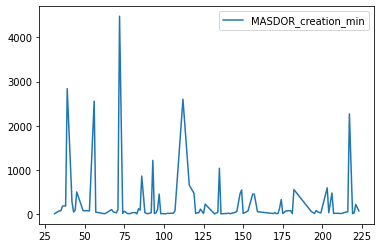

In [384]:
df_DCS_hibajegy.plot(y="MASDOR_creation_min",kind="line")

In [385]:
df_DCS_hibajegy.dtypes

Task                            object
TaskLink                        object
Desc                            object
Inc                             object
IncLink                         object
Creation                datetime64[ns]
Start                   datetime64[ns]
End                     datetime64[ns]
LongDesc                        object
End_Delta              timedelta64[ns]
End_Delta_sec                    int64
Start_Delta            timedelta64[ns]
Start_Delta_sec                  int64
MASDOR                  datetime64[ns]
masdor_start           timedelta64[ns]
MASDOR_creation_min              int64
day_of_week                      int64
dtype: object

<AxesSubplot:xlabel='day_of_week', ylabel='MASDOR_creation_min'>

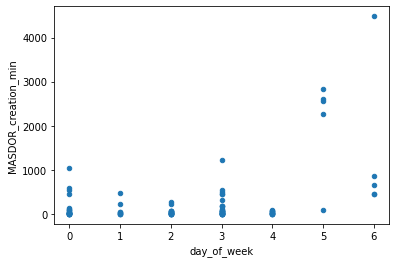

In [386]:
df_DCS_hibajegy.plot(x="day_of_week",y="MASDOR_creation_min",kind="scatter")

<AxesSubplot:ylabel='Frequency'>

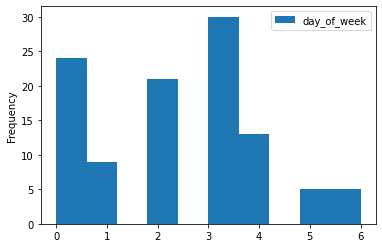

In [387]:
df_DCS_hibajegy.plot(y="day_of_week",kind="hist")

In [388]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/inc/"

In [389]:
def get_all_file(path:str,name_str:str):
    import os
    files=os.scandir(path=path,)
    o=[a.name for a in files if name_str in a.name ]
    o.sort()
    return o

In [390]:
txt_files =get_all_file(path,".txt")
f=open(path+txt_files[0])
txt_content=f.read()
txt_content_list=txt_content.split("\n")
txt_content_list[::-1]

['Terület gazdaENFO',
 'Prioritás4 - Alacsony',
 'MegnyitottaZoltán (C-Inform) Varga',
 'Külső végrehajtófalse',
 'Külső szerviz értesítvefalse',
 'Ismétlő hibafalse',
 'Haváriás hibafalse',
 'Hatás4 - Normál',
 'EseményállapotÚj',
 'Érintett CIDorogi Szintetikus üzemek DCS rendszere',
 'Anyagbeszerzés szükségesfalse',
 'Mezőmódosítások•2023-02-15 10:07:34',
 'Zoltán (C-Inform) Varga',
 'ZV',
 'FelelősZoltán (C-Inform) Varga',
 'EseményállapotFolyamatban– előtte:Új',
 'Mezőmódosítások•2023-02-15 10:07:41',
 'Zoltán (C-Inform) Varga',
 'ZV',
 'E-mail részletek megjelenítése',
 'Címzett:viragp@richter.hu',
 'Küldő:IT Service Desk',
 'Tárgy:INC0213743 (Sikertelen bejelentkezés a Dorogi Szinte...) - Bejelentése rögzítésre került | Your incident has been logged',
 'E-mail elküldött',
 'E-mail elküldött•2023-02-15 10:07:50',
 'Rendszer',
 'Felelős[Üres]– előtte:Zoltán (C-Inform) Varga',
 'Mezőmódosítások•2023-02-15 10:07:52',
 'Zoltán (C-Inform) Varga',
 'ZV',
 'E-mail részletek megjelenítés

In [391]:
txt_files

['INC0213743.txt',
 'INC0214451.txt',
 'INC0214483.txt',
 'INC0214485.txt',
 'INC0214493.txt',
 'INC0214669.txt',
 'INC0214722.txt',
 'INC0214724.txt',
 'INC0214769.txt',
 'INC0214847.txt',
 'INC0214992.txt',
 'INC0215151.txt',
 'INC0215371.txt',
 'INC0215565.txt',
 'INC0215749.txt',
 'INC0216069.txt']

In [392]:
txt_content

'Rendszer\nMezőmódosítások•2023-02-22 10:36:02\nEseményállapotLezárt– előtte:Megoldott\nRendszer\nE-mail elküldött•2023-02-15 10:16:44\nE-mail elküldött\nTárgy:INC0213743 (Sikertelen bejelentkezés a Dorogi Szinte...) - Bejelentése megoldásra került | Your incident has been resolved\nKüldő:IT Service Desk\nCímzett:viragp@richter.hu\nE-mail részletek megjelenítése\nRendszer\nE-mail elküldött•2023-02-15 10:16:44\nE-mail elküldött\nTárgy:ServiceNow - Neveden lévő Incidens frissült | Incident assigned to you has been updated\nKüldő:IT Service Desk\nCímzett:l.kollar@Richter.hu\nE-mail részletek megjelenítése\nLK\nLajos Kollár\nMezőmódosítások•2023-02-15 10:16:26\nEseményállapotMegoldott– előtte:Folyamatban\nRendszer\nE-mail elküldött•2023-02-15 10:15:54\nE-mail elküldött\nTárgy:ServiceNow - Incidens került a nevedre | Incident has been assigned to you\nKüldő:IT Service Desk\nCímzett:l.kollar@Richter.hu\nE-mail részletek megjelenítése\nRendszer\nE-mail elküldött•2023-02-15 10:15:54\nE-mail el

In [393]:
def txt_analyst(txt_list:list, to_print=True):
    o=[]
    inc_start=False
    inc_user=False
    inc_group=False
    inc_solved=False
    inc_name=""
    cimzett=""
    for element in txt_list:
        if to_print:
            print("---------------")
        if to_print:
            print(element)  
        if "Címzett" in element:
            cimzett=element.split(":")[1]

        if "Bejelentése rögzítésre került" in element:
            inc_start=True
        
        if "Bejelentése megoldásra került" in element:
            inc_solved=True

        if "ServiceNow - Incidens került a nevedre" in element:
            inc_user=True

        if "Incidens került a csoportodra" in element:
            inc_group=True
        
        if inc_name=="" and "Associated to Incident" in element :
            inc_name=inc_name+element.split(":")[1].strip()
        
        if inc_name=="" and "Tárgy:INC" in element :
            inc_name=inc_name+element.split(" ")[0].split(":")[1].strip()
       
        
        if inc_start and  "E-mail elküldött•" in element :
            o2=f"a#servicedesk#{element.split('•')[1]}#{cimzett}"
            if to_print:
                print(o2)
            o.append(o2)
            inc_start=False
         

        if inc_user and "E-mail elküldött•" in element:
            
            o2=f"1#kollégán#{element.split('•')[1]}#{cimzett}"
            if to_print:
                print(o2)
            o.append(o2)
            inc_user=False
        
        if inc_group and "E-mail elküldött•" in element:
            o2=f"0#csoporton#{element.split('•')[1]}#{cimzett}"
            if to_print:
                print(o2)
            o.append(o2)
            inc_group=False

        if inc_solved and "E-mail elküldött•" in element:
            o2=f"2#megoldva#{element.split('•')[1]}#{cimzett}"
            if to_print:
                print(o2)
            o.append(o2)
            inc_solved=False

    if to_print:
        print(inc_name)


    return([inc_name,len(o),o])
        



In [394]:
'''
61 INC0213507
2:megoldott:2023-02-14 15:32:19
1:kollégán:2023-02-14 15:30:34
0:csoporton:2023-02-14 15:14:28
0:csoporton:2023-02-14 11:26:03
1:kollégán:2023-02-14 11:22:01
0:csoporton:2023-02-14 11:16:55
'''

'\n61 INC0213507\n2:megoldott:2023-02-14 15:32:19\n1:kollégán:2023-02-14 15:30:34\n0:csoporton:2023-02-14 15:14:28\n0:csoporton:2023-02-14 11:26:03\n1:kollégán:2023-02-14 11:22:01\n0:csoporton:2023-02-14 11:16:55\n'

In [395]:
txt_analyst(txt_content_list[::-1],to_print=True)

---------------
Terület gazdaENFO
---------------
Prioritás4 - Alacsony
---------------
MegnyitottaZoltán (C-Inform) Varga
---------------
Külső végrehajtófalse
---------------
Külső szerviz értesítvefalse
---------------
Ismétlő hibafalse
---------------
Haváriás hibafalse
---------------
Hatás4 - Normál
---------------
EseményállapotÚj
---------------
Érintett CIDorogi Szintetikus üzemek DCS rendszere
---------------
Anyagbeszerzés szükségesfalse
---------------
Mezőmódosítások•2023-02-15 10:07:34
---------------
Zoltán (C-Inform) Varga
---------------
ZV
---------------
FelelősZoltán (C-Inform) Varga
---------------
EseményállapotFolyamatban– előtte:Új
---------------
Mezőmódosítások•2023-02-15 10:07:41
---------------
Zoltán (C-Inform) Varga
---------------
ZV
---------------
E-mail részletek megjelenítése
---------------
Címzett:viragp@richter.hu
---------------
Küldő:IT Service Desk
---------------
Tárgy:INC0213743 (Sikertelen bejelentkezés a Dorogi Szinte...) - Bejelentése rögzí

['INC0213743',
 4,
 ['a#servicedesk#2023-02-15 10:07:50#viragp@richter.hu',
  '0#csoporton#2023-02-15 10:07:59#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
  '1#kollégán#2023-02-15 10:15:54#l.kollar@Richter.hu',
  '2#megoldva#2023-02-15 10:16:44#viragp@richter.hu']]

In [396]:
def txt_file_extractor(path:str, to_print=True):
    
    txt_files =get_all_file(path,".txt")
    o=[]
    for txt_file in txt_files:
        if to_print:
            print(txt_file)
        f=open(path+txt_file)
        txt_content=f.read()
        txt_content_list=txt_content.split("\n")
        res=txt_analyst(txt_content_list[::-1],to_print=False)
        o.append(res)
    return(o)

In [397]:
text_o=txt_file_extractor(path)

INC0213743.txt
INC0214451.txt
INC0214483.txt
INC0214485.txt
INC0214493.txt
INC0214669.txt
INC0214722.txt
INC0214724.txt
INC0214769.txt
INC0214847.txt
INC0214992.txt
INC0215151.txt
INC0215371.txt
INC0215565.txt
INC0215749.txt
INC0216069.txt


In [398]:
text_o

[['INC0213743',
  4,
  ['a#servicedesk#2023-02-15 10:07:50#viragp@richter.hu',
   '0#csoporton#2023-02-15 10:07:59#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-15 10:15:54#l.kollar@Richter.hu',
   '2#megoldva#2023-02-15 10:16:44#viragp@richter.hu']],
 ['INC0214451',
  3,
  ['a#servicedesk#2023-02-20 07:32:59#A.Dekay@richter.hu, Z.Lakhegyi@richter.hu',
   '0#csoporton#2023-02-20 07:33:17#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-20 07:34:26#szenczi@richter.hu']],
 ['INC0214483',
  4,
  ['a#servicedesk#2023-02-20 09:13:47#kifferdg@richter.hu, jamborat@richter.hu',
   '0#csoporton#2023-02-20 09:14:39#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-20 09:19:27#l.kollar@Richter.hu',
   '2#megoldva#2023-02-20 09:42:25#kifferdg@richter.hu']],
 ['INC02144

In [399]:
a="Tárgy:INC0215749 ([DCS rendszerek dorog - hibajegy]) - Bejelentése rögzítésre került | Your incident has been logged"

In [400]:
a.split(":")[1][:10]

'INC0215749'

In [401]:
import json

In [402]:
fname="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/csv/incident20230227.csv"

In [403]:
df_csv=pd.read_csv(fname,encoding="latin_1")

In [404]:
df_csv


,number,priority,state,assigned_to,short_description,sys_class_name,group_list,assignment_group,caller_id,problem_id,...,sys_created_on,resolved_at,opened_by,description,calendar_stc,incident_state,work_notes_list,work_notes,assignment_group.name,assigned_to.notification
0,INC0215749,4 - Alacsony,Megoldott,Imre Váradi,[DCS rendszerek dorog - hibajegy],Incidens,NaN,MAS_DOR,Attila Juhász,NaN,...,2023-02-27 06:55:35,2023-02-27 07:53:27,Zoltán (C-Inform) Varga,\r\nÉrintett rendszer neve Szteroid II. Üzem\r...,3 543,Megoldott,Imre Váradi,2023-02-27 07:53:27 - Imre Váradi (Munkamegjeg...,MAS_DOR,Engedélyezés
1,INC0215371,3 - Közepes,Megoldott,Kornél Ferenc Nagy,Szteroid II II-es axis legtechnika ha megall v...,Incidens,NaN,MAS_DOR,Dávid Szabó,NaN,...,2023-02-23 12:04:53,2023-02-24 08:49:40,Levente Zsolt Aranyi,received from: MAS_DOR_2_ServiceDesk@richter.h...,74 784,Megoldott,NaN,2023-02-23 12:18:13 - Levente Zsolt Aranyi (Mu...,MAS_DOR,Engedélyezés
2,INC0215151,4 - Alacsony,Megoldott,Imre Váradi,[DCS rendszerek dorog - hibajegy],Incidens,NaN,MAS_DOR,DUMMY_ITSM,NaN,...,2023-02-22 13:25:15,2023-02-23 11:03:35,Levente Fülöp,received from: MAS_DOR_2_ServiceDesk@richter.h...,77 973,Megoldott,Imre Váradi,2023-02-23 11:03:35 - Imre Váradi (Munkamegjeg...,MAS_DOR,Engedélyezés
3,INC0214992,4 - Alacsony,Megszakítva,Imre Váradi,[DCS rendszerek dorog - hibajegy],Incidens,NaN,MAS_DOR,DUMMY_ITSM,NaN,...,2023-02-22 07:56:04,NaN,Levente Fülöp,received from: MAS_DOR_2_ServiceDesk@richter.h...,10 334,Megszakítva,Imre Váradi,2023-02-22 09:13:59 - Imre Váradi (Munkamegjeg...,MAS_DOR,Engedélyezés
4,INC0214769,4 - Alacsony,Megoldott,Imre Váradi,[DCS rendszerek dorog - hibajegy],Incidens,NaN,MAS_DOR,DUMMY_ITSM,NaN,...,2023-02-21 09:08:59,2023-02-21 11:27:20,Réka Szonja (C-Inform) Malinóczki,received from: MAS_DOR_2_ServiceDesk@richter.h...,8 312,Megoldott,NaN,2023-02-21 11:27:20 - Imre Váradi (Munkamegjeg...,MAS_DOR,Engedélyezés
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,INC0186699,4 - Alacsony,Lezárt,Norbert Szenczi,L5 légkezel? hibás split-range szabályzás,Incidens,NaN,MAS_DOR,Attila Tótik,NaN,...,2022-09-21 07:38:07,2022-09-30 08:30:50,Attila Tótik,A következ? beírás került a m?szaknaplóba.-> S...,780 763,Lezárt,NaN,NaN,MAS_DOR,Engedélyezés
70,INC0186693,3 - Közepes,Megszakítva,Imre Váradi,[DCS rendszerek dorog - hibajegy],Incidens,NaN,MAS_DOR,DUMMY_ITSM,NaN,...,2022-09-21 07:23:39,NaN,Guest,received from: MAS_DOR_2_ServiceDesk@richter.h...,7 804 570,Megszakítva,NaN,2022-12-20 14:19:50 - Imre Váradi (Munkamegjeg...,MAS_DOR,Engedélyezés
71,INC0185060,3 - Közepes,Lezárt,Kornél Ferenc Nagy,MIFO-D -ben az 1. izolátor és 2. izolátorhoz t...,Incidens,NaN,MAS_DOR,Gyöngyvér Keil,NaN,...,2022-09-12 15:15:48,2022-10-21 07:48:19,Gyöngyvér Keil,MIFO-D -ben az 1. izolátor és 2. izolátorhoz t...,3 342 751,Lezárt,NaN,2022-09-13 10:50:54 - Leonárd Gábor Csapó (Mun...,MAS_DOR,Engedélyezés
72,INC0184094,4 - Alacsony,Lezárt,Kornél Ferenc Nagy,Az energia osztálytól naponta várt e-mail ripo...,Incidens,NaN,MAS_DOR,Péter Tamás Magyari,NaN,...,2022-09-07 08:19:03,2022-10-14 14:29:04,Péter Tamás Magyari,Az energia osztálytól naponta várt e-mail ripo...,3 219 001,Lezárt,NaN,2022-10-10 13:15:47 - Andrea Soós (Munkamegjeg...,MAS_DOR,Engedélyezés


In [405]:
df_csv.columns

Index(['number', 'priority', 'state', 'assigned_to', 'short_description',
       'sys_class_name', 'group_list', 'assignment_group', 'caller_id',
       'problem_id', 'opened_at', 'sys_created_on', 'resolved_at', 'opened_by',
       'description', 'calendar_stc', 'incident_state', 'work_notes_list',
       'work_notes', 'assignment_group.name', 'assigned_to.notification'],
      dtype='object')

In [470]:
df_inc_2023=df_csv.iloc[:][["number",'short_description','number','opened_at','sys_created_on',	'resolved_at']]

In [471]:
df_inc_2023.to_csv("inc_2023.csv")

In [407]:
#taskok eseményeinek kigyűjtése részletes elemzés céljából


In [408]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/task/"

In [409]:
task_files=get_all_file(path,".html")

In [410]:
fname=task_files[0]



In [411]:
print(fname)

TASK0216008 _ Eseményfeladat _ RG - IT Service Management.html


In [412]:
fname = "TASK0282193 _ Eseményfeladat _ RG - IT Service Management.html"   # csak a teszt miatt

In [413]:
htmltext=open(path+fname)
ht=htmltext.read()
soup=BeautifulSoup(ht,"html.parser")

In [414]:
print("------------------------------------------------")

soup=BeautifulSoup(ht,"html.parser")
table_rows=soup.find_all("li", class_="h-card h-card_md h-card_comments")


------------------------------------------------


In [415]:
for ch in table_rows[2].children:
    print (ch.text)

Rendszer
E-mail elküldött•2022-05-17 08:42:439 hónappal ezelőtt
E-mail elküldöttTárgy:ServiceNow - Neveden lévő feladat frissült | Task assigned to you has been updatedKüldő:IT Service DeskCímzett:l.kollar@Richter.huE-mail részletek megjelenítése




In [416]:
def find_elements(el):
    temp=el.findChildren()
    return len(temp)

In [417]:
def incident_record_elements(incident_record, to_print=False):
    out=[]
    for child in incident_record.descendants:
        try:
            if find_elements(child)==0:
                if to_print:
                    print(child.text)
                out.append(child.text)
        except:
            pass
    return(out)
            

In [418]:
def task_elements(path,fname,to_print=False):
    htmltext=open(path+fname)
    ht=htmltext.read()
    soup=BeautifulSoup(ht,"html.parser")
    table_rows=soup.find_all("li", class_="h-card h-card_md h-card_comments")
    o=[]
    for table_row_element in table_rows: 
        
        out= incident_record_elements(table_row_element,to_print=to_print)
        print(out)
        if out[0]=="Rendszer" and "Feladat került a nevedre" in out[8]:
            fp=f"1#kollégán#{out[3]}#{out[12]}"
            o.append(fp)
            if to_print:
                print(fp) 
    
        if out[0]=="Rendszer" and "Feladat került a csoportodra" in out[8]:
            fp=f"0#csoporton#{out[3]}#{out[12]}"
            o.append(fp)
            if to_print:
                print(fp)
    
        if out[3]=="Mezőmódosítások" and "Lezárt" in out[8]:
            fp=f"2#megoldva#{out[5]}#{out[2]}"
            o.append(fp)
            if to_print:
                print(fp)

        if out[3]=="Mezőmódosítások" and "Felelős" in out[7]:
            fp=f"1#kollégán#{out[5]}#{out[2]}"
            o.append(fp)
            if to_print:
                print(fp)
        
        if len(out)>10:
            if out[3]=="Mezőmódosítások" and "Felelős" in out[11]:
                fp=f"1#kollégán#{out[5]}#{out[2]}"
                o.append(fp)
                if to_print:
                    print(fp)
    return o
        
        


In [419]:
fname=task_files[0]

In [420]:
fname

'TASK0216008 _ Eseményfeladat _ RG - IT Service Management.html'

In [421]:
task_elements(path,fname,to_print=True)

IV

Imre Váradi
Mezőmódosítások
•
2021-11-05 07:09:23
kb. egy év ezelőtt
Állapot
Lezárt (befejezett)
– előtte:
Folyamatban

['IV', '', 'Imre Váradi', 'Mezőmódosítások', '•', '2021-11-05 07:09:23', 'kb. egy év ezelőtt', 'Állapot', 'Lezárt (befejezett)', '– előtte:', 'Folyamatban', '']
2#megoldva#2021-11-05 07:09:23#Imre Váradi
NS

Norbert Szenczi
Mezőmódosítások
•
2021-09-08 13:04:27
kb. egy év ezelőtt
Állapot
Folyamatban
– előtte:
Nyitott

['NS', '', 'Norbert Szenczi', 'Mezőmódosítások', '•', '2021-09-08 13:04:27', 'kb. egy év ezelőtt', 'Állapot', 'Folyamatban', '– előtte:', 'Nyitott', '']
LK

Lajos Kollár
Munkamegjegyzések
•
2021-09-08 09:11:08
kb. egy év ezelőtt


['LK', '', 'Lajos Kollár', 'Munkamegjegyzések', '•', '2021-09-08 09:11:08', 'kb. egy év ezelőtt', '', '']
LK

Lajos Kollár
Mezőmódosítások
•
2021-09-08 09:08:49
kb. egy év ezelőtt
Felelős
Lajos Kollár

['LK', '', 'Lajos Kollár', 'Mezőmódosítások', '•', '2021-09-08 09:08:49', 'kb. egy év ezelőtt', 'Felelős', 'Lajos Kollár', 

['2#megoldva#2021-11-05 07:09:23#Imre Váradi',
 '1#kollégán#2021-09-08 09:08:49#Lajos Kollár']

In [422]:
task_files

['TASK0216008 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0225687 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0225759 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0227851 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0230843 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0232153 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0233522 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0234168 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0234169 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0234244 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0235078 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0241059 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0241109 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0242057 _ Eseményfeladat _ RG - IT Service Management.html',
 'TASK0243081 _ Eseményfeladat _ RG - IT Servic

In [423]:
def all_task_elements(path,tasklist,to_print=False):
    out=[]
    for task in tasklist:
        o=task_elements(path,task)
        if to_print:
            print(o)        
        out.append([task[:11],len(o),o[::-1]])
    return out

In [424]:
task_o=all_task_elements(path,task_files,to_print=False)

['IV', '', 'Imre Váradi', 'Mezőmódosítások', '•', '2021-11-05 07:09:23', 'kb. egy év ezelőtt', 'Állapot', 'Lezárt (befejezett)', '– előtte:', 'Folyamatban', '']
['NS', '', 'Norbert Szenczi', 'Mezőmódosítások', '•', '2021-09-08 13:04:27', 'kb. egy év ezelőtt', 'Állapot', 'Folyamatban', '– előtte:', 'Nyitott', '']
['LK', '', 'Lajos Kollár', 'Munkamegjegyzések', '•', '2021-09-08 09:11:08', 'kb. egy év ezelőtt', '', '']
['LK', '', 'Lajos Kollár', 'Mezőmódosítások', '•', '2021-09-08 09:08:49', 'kb. egy év ezelőtt', 'Felelős', 'Lajos Kollár', '']
['BH', '', 'Bálint Heim', 'Mezőmódosítások', '•', '2021-09-08 07:48:13', 'kb. egy év ezelőtt', 'Állapot', 'Nyitott', 'Érintett CI', 'ABB System 800xA DCS folyamatirányító re', 'Hatás', '3 - Többünket érint', 'Megnyitotta', 'Bálint Heim', 'Prioritás', '3 - Közepes', '']
['LK', '', 'Lajos Kollár', 'Munkamegjegyzések', '•', '2021-10-19 15:09:13', 'kb. egy év ezelőtt', '', '']
['LK', '', 'Lajos Kollár', 'Mezőmódosítások', '•', '2021-10-19 15:09:13', 'kb

In [425]:
task_o[4]

['TASK0230843',
 2,
 ['1#kollégán#2021-11-04 11:09:45#Károly Zoltán Magyar',
  '2#megoldva#2021-11-04 13:30:30#Károly Zoltán Magyar']]

In [426]:
#incident search

In [427]:
def inc_elements(path,fname,to_print=False):
    htmltext=open(path+fname)
    ht=htmltext.read()
    soup=BeautifulSoup(ht,"html.parser")
    table_rows=soup.find_all("li", class_="h-card h-card_md h-card_comments")
    o=[]
    for table_row_element in table_rows: 
        
        out= incident_record_elements(table_row_element,to_print=to_print)
        if to_print:
            print("-----")
        if out[0]=="Rendszer" and "Incidens került a nevedre" in out[8]:
            fp=f"1#kollégán#{out[3]}#{out[12]}"
            o.append(fp)
            if to_print:
                print(fp) 
    
        if out[0]=="Rendszer" and "Incidens került a csoportodra" in out[8]:
            fp=f"0#csoporton#{out[3]}#{out[12]}"
            o.append(fp)
            if to_print:
                print(fp)
    
        if out[1]=="Mezőmódosítások" and "Lezárt" in out[6]:
            fp=f"2#megoldva#{out[3]}#{out[8]}"
            o.append(fp)
            if to_print:
                print(fp)
    return o
        
        

In [428]:
def all_incident_elements(path,tasklist,to_print=False):
    out=[]
    for task in tasklist:
        o=inc_elements(path,task)
        if to_print:
            print(o)        
        out.append([task[:11],len(o),o[::-1]])
    return out

In [429]:
#inc_elements(path,task_files[5],to_print=True)

In [430]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/inc/"

In [431]:
task_files=get_all_file(path,".html")

In [432]:
#task_files


In [433]:
inc_o=all_incident_elements(path,task_files,to_print=False)

In [434]:
task_o

[['TASK0216008',
  2,
  ['1#kollégán#2021-09-08 09:08:49#Lajos Kollár',
   '2#megoldva#2021-11-05 07:09:23#Imre Váradi']],
 ['TASK0225687',
  2,
  ['1#kollégán#2021-10-15 08:35:44#Lajos Kollár',
   '2#megoldva#2021-10-19 15:09:13#Lajos Kollár']],
 ['TASK0225759',
  2,
  ['1#kollégán#2021-10-15 10:09:33#Károly Zoltán Magyar',
   '2#megoldva#2021-10-19 15:07:54#Károly Zoltán Magyar']],
 ['TASK0227851',
  2,
  ['1#kollégán#2021-10-25 10:21:24#Ádám Mészáros',
   '2#megoldva#2021-11-15 11:00:12#Károly Zoltán Magyar']],
 ['TASK0230843',
  2,
  ['1#kollégán#2021-11-04 11:09:45#Károly Zoltán Magyar',
   '2#megoldva#2021-11-04 13:30:30#Károly Zoltán Magyar']],
 ['TASK0232153',
  2,
  ['1#kollégán#2021-11-08 06:10:48#Kornél Ferenc Nagy',
   '2#megoldva#2021-11-16 09:27:20#Kornél Ferenc Nagy']],
 ['TASK0233522',
  2,
  ['1#kollégán#2021-11-11 16:42:44#Károly Zoltán Magyar',
   '2#megoldva#2021-11-17 10:19:35#Károly Zoltán Magyar']],
 ['TASK0234168',
  2,
  ['1#kollégán#2021-11-15 08:20:53#Imre Vá

In [435]:
inc_o

[['Eseményfel', 0, []],
 ['INC0182764 ',
  3,
  ['1#kollégán#2022-10-10 14:32:07#Im.Varadi@Richter.hu',
   '0#csoporton#2022-10-10 14:32:07#Im.Varadi@Richter.hu,  KF.Nagy@richter.hu,  MagyarK@richter.hu,  tilla@richter.hu,  szenczi@richter.hu...',
   '2#megoldva#2022-10-25 07:36:02#Megoldott']],
 ['INC0184094 ',
  3,
  ['0#csoporton#2022-10-10 13:15:56#Im.Varadi@Richter.hu,  KF.Nagy@richter.hu,  MagyarK@richter.hu,  tilla@richter.hu,  szenczi@richter.hu...',
   '1#kollégán#2022-10-10 13:17:31#KF.Nagy@richter.hu',
   '2#megoldva#2022-10-21 14:36:02#Megoldott']],
 ['INC0185060 ',
  3,
  ['0#csoporton#2022-10-10 13:18:28#Im.Varadi@Richter.hu,  KF.Nagy@richter.hu,  MagyarK@richter.hu,  tilla@richter.hu,  szenczi@richter.hu...',
   '1#kollégán#2022-10-10 13:19:44#KF.Nagy@richter.hu',
   '2#megoldva#2022-10-28 08:36:01#Megoldott']],
 ['INC0186693 ',
  2,
  ['0#csoporton#2022-10-10 13:22:50#Im.Varadi@Richter.hu,  KF.Nagy@richter.hu,  MagyarK@richter.hu,  tilla@richter.hu,  szenczi@richter.hu

In [436]:
text_o

[['INC0213743',
  4,
  ['a#servicedesk#2023-02-15 10:07:50#viragp@richter.hu',
   '0#csoporton#2023-02-15 10:07:59#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-15 10:15:54#l.kollar@Richter.hu',
   '2#megoldva#2023-02-15 10:16:44#viragp@richter.hu']],
 ['INC0214451',
  3,
  ['a#servicedesk#2023-02-20 07:32:59#A.Dekay@richter.hu, Z.Lakhegyi@richter.hu',
   '0#csoporton#2023-02-20 07:33:17#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-20 07:34:26#szenczi@richter.hu']],
 ['INC0214483',
  4,
  ['a#servicedesk#2023-02-20 09:13:47#kifferdg@richter.hu, jamborat@richter.hu',
   '0#csoporton#2023-02-20 09:14:39#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-20 09:19:27#l.kollar@Richter.hu',
   '2#megoldva#2023-02-20 09:42:25#kifferdg@richter.hu']],
 ['INC02144

In [437]:
len(text_o)+len(inc_o)+len(task_o)

315

In [438]:
all_incident_data=text_o+inc_o+task_o

In [439]:
all_incident_data


[['INC0213743',
  4,
  ['a#servicedesk#2023-02-15 10:07:50#viragp@richter.hu',
   '0#csoporton#2023-02-15 10:07:59#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-15 10:15:54#l.kollar@Richter.hu',
   '2#megoldva#2023-02-15 10:16:44#viragp@richter.hu']],
 ['INC0214451',
  3,
  ['a#servicedesk#2023-02-20 07:32:59#A.Dekay@richter.hu, Z.Lakhegyi@richter.hu',
   '0#csoporton#2023-02-20 07:33:17#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-20 07:34:26#szenczi@richter.hu']],
 ['INC0214483',
  4,
  ['a#servicedesk#2023-02-20 09:13:47#kifferdg@richter.hu, jamborat@richter.hu',
   '0#csoporton#2023-02-20 09:14:39#radizs@richter.hu, Im.Varadi@Richter.hu, KF.Nagy@richter.hu, MagyarK@richter.hu, tilla@richter.hu...',
   '1#kollégán#2023-02-20 09:19:27#l.kollar@Richter.hu',
   '2#megoldva#2023-02-20 09:42:25#kifferdg@richter.hu']],
 ['INC02144

In [467]:
for element in all_incident_data:
    

    data_0=f"{element[0].strip()};{element[1]}"
    data_1=""
    data_2=""

    for ts_data in element[2]:
        data_list=ts_data.split("#")
        if data_list[0]=="0" and "Im.Varadi@Richter.hu" in data_list[3] and "KF.Nagy@richter.hu" in data_list[3]:
            data_1=f";{data_list[2]}"
        if data_list[0]=="1" and data_list[3] in ["Im.Varadi@Richter.hu",  "KF.Nagy@richter.hu",  "MagyarK@richter.hu",  "tilla@richter.hu",  "szenczi@richter.hu","l.kollar@richter.hu","serdultv@richter.hu", "Lajos Kollár",
                                                  "Károly Zoltán Magyar","Kornél Ferenc Nagy","Imre Váradi","Norbert Szenczi"]:
            data_2=f";{data_list[2]}"
    #print(element) 
    data_o=data_0+data_1+data_2   
    print(data_o)    
        



INC0213743;4;2023-02-15 10:07:59
INC0214451;3;2023-02-20 07:33:17;2023-02-20 07:34:26
INC0214483;4;2023-02-20 09:14:39
INC0214485;5;2023-02-20 09:29:09;2023-02-20 10:50:25
INC0214493;4;2023-02-20 09:37:10
INC0214669;3;2023-02-20 15:45:39;2023-02-20 15:52:53
INC0214722;3;2023-02-21 06:47:03
INC0214724;6;2023-02-24 09:52:36;2023-02-24 10:08:15
INC0214769;4;2023-02-21 09:09:24;2023-02-21 09:53:07
INC0214847;16;2023-02-27 08:31:21;2023-02-24 10:03:56
INC0214992;3;2023-02-22 07:58:01;2023-02-22 09:06:20
INC0215151;6;2023-02-22 13:25:35;2023-02-22 13:28:03
INC0215371;4;2023-02-23 12:18:24;2023-02-23 12:19:19
INC0215565;8;2023-02-24 10:56:03;2023-02-24 10:57:51
INC0215749;5;2023-02-27 06:56:04;2023-02-27 06:57:40
INC0216069;5;2023-02-28 06:05:46;2023-02-28 06:29:58
Eseményfel;0
INC0182764;3;2022-10-10 14:32:07;2022-10-10 14:32:07
INC0184094;3;2022-10-10 13:15:56;2022-10-10 13:17:31
INC0185060;3;2022-10-10 13:18:28;2022-10-10 13:19:44
INC0186693;2;2022-10-10 13:22:50;2022-10-10 13:57:45
INC01

In [440]:
# Szamoljuk meg a különbözőket.


In [441]:
counter_d=[]
for task_element in all_incident_data:
    counter_d.append(task_element[0])

In [442]:
len(counter_d)

315

In [443]:
counter_set=set(counter_d)